# Preprocessing 

In [135]:
#!pip install plotly

In [136]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import re
import plotly.figure_factory as ff
import plotly.express as px

In [137]:
df = pd.read_csv('games_info.csv')

In [138]:
df.head()

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,SUPPORTED_PLATFORMS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,RELEASE_DATE,TOTAL_TWITCH_PEAK,PRICE,N_DLC,24_HOUR_PEAK
0,Dragon's Dogma: Dark Arisen,"Store Genres Action (1), Adventure (25), RPG (3)",review_score 8,7 Languages,Capcom,Windows,39271,5015,NaN,15 January 2016 – 16:48:00 UTC (9 years ago),"27,368\nall-time peak 9 years ago17 January 2016",$22.49,3.0,"1,064\n24-hour peak"
1,Forza Horizon 5,"Store Genres Action (1), Adventure (25), Racin...",review_score 8,24 Languages,Playground Games,Windows,156683,21075,NaN,9 November 2021 – 04:58:00 UTC (3 years ago),"81,096\nall-time peak 3 years ago13 November 2021",$32.78,53.0,"16,131\n24-hour peak"
2,Thrive,"Store Genres Casual (4), Indie (23), Simulatio...",review_score 8,1 Languages,Revolutionary Games Studio,Windows Linux,872,70,Engine.Godot,26 November 2021 – 10:54:48 UTC (3 years ago),145\nall-time peak 2 years ago24 July 2022,$2.99,NaN,21\n24-hour peak
3,Layers of Fear (2016),"Store Genres Adventure (25), Indie (23)",review_score 8,12 Languages,Bloober Team SA,Windows macOS Linux,22766,2819,Engine.Unity,15 February 2016 – 21:53:00 UTC (8 years ago),"145,384\nall-time peak 6 years ago13 June 2018",$10.19,3.0,31\n24-hour peak
4,TaskPals,"Store Genres Indie (23), Free to Play (37)",review_score 8,1 Languages,lazarche,Windows,834,66,"Detected Technologies (?), SDK.SteamworksNET",25 May 2023 – 10:22:41 UTC (12 months ago),"3,778\nall-time peak 10 months ago18 July 2023",NaN,4.0,318\n24-hour peak


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2169 entries, 0 to 2168
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NAME                   2169 non-null   object 
 1   STORE_GENRE            2134 non-null   object 
 2   RATING_SCORE           2138 non-null   object 
 3   N_SUPPORTED_LANGUAGES  2139 non-null   object 
 4   DEVELOPERS             2168 non-null   object 
 5   SUPPORTED_PLATFORMS    2109 non-null   object 
 6   POSITIVE_REVIEWS       2169 non-null   int64  
 7   NEGATIVE_REVIEWS       2169 non-null   int64  
 8   TECHNOLOGIES           1770 non-null   object 
 9   RELEASE_DATE           2165 non-null   object 
 10  TOTAL_TWITCH_PEAK      2169 non-null   object 
 11  PRICE                  1453 non-null   object 
 12  N_DLC                  764 non-null    float64
 13  24_HOUR_PEAK           2122 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 237.4+

In [140]:
df.describe()

,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,N_DLC
count,2.169000e+03,2169.000000,764.000000
mean,2.160550e+04,1303.540802,6.007853
std,7.684003e+04,5936.437662,17.606443
min,3.400000e+01,0.000000,1.000000
25%,7.590000e+02,35.000000,1.000000
50%,2.692000e+03,141.000000,2.000000
75%,1.071300e+04,619.000000,4.000000
max,1.257272e+06,190953.000000,379.000000


In [141]:
df.describe(include='object')

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,SUPPORTED_PLATFORMS,TECHNOLOGIES,RELEASE_DATE,TOTAL_TWITCH_PEAK,PRICE,24_HOUR_PEAK
count,2169,2134,2138,2139,2168,2109,1770,2165,2169,1453,2122
unique,2017,319,3,36,1613,6,228,2000,1998,123,636
top,TOEM,Store Genres Action (1),review_score 8,1 Languages,Square Enix,Windows,Engine.Unity,30 August 2006 – 07:00:00 UTC (18 years ago),2 years ago,$19.99,4\n24-hour peak
freq,4,108,1271,557,16,1243,729,4,8,202,77


In [142]:
# duplicate_rows = df[df.duplicated(subset=['NAME'])]
# print("Duplicate Rows based on the 'NAME' column:")
# duplicate_rows
# num_duplicates = duplicate_rows.shape[0]
# print(f"Number of duplicate rows based on the 'NAME' column: {num_duplicates}")
# df = df_copy.drop_duplicates(subset=['NAME'], keep='first')
# duplicate_rows


df_copy = df.copy()
for col in df_copy.columns:
    if df_copy[col].apply(lambda x: isinstance(x, list)).any():
        df_copy[col] = df_copy[col].apply(tuple)
duplicate_rows = df_copy[df_copy.duplicated()]
num_duplicates = duplicate_rows.shape[0]
print(f"Number of duplicate rows: {num_duplicates}")
df = df_copy.drop_duplicates(keep='first')
duplicate_rows

Number of duplicate rows: 114


,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,SUPPORTED_PLATFORMS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,RELEASE_DATE,TOTAL_TWITCH_PEAK,PRICE,N_DLC,24_HOUR_PEAK
61,The Night of the Scissors,"Store Genres Action (1), Adventure (25), Indie...",review_score 8,10 Languages,Tomás Esconjaureguy,Windows macOS Linux,343,14,Engine.Unity,13 May 2022 – 15:20:15 UTC (2 years ago),11\nall-time peak 2 years ago14 May 2022,$2.99,NaN,2\n24-hour peak
132,If My Heart Had Wings -Flight Diary-,"Store Genres Adventure (25), Casual (4), Simul...",review_score 8,3 Languages,MoeNovel,Windows,452,23,NaN,28 February 2019 – 01:56:15 UTC (5 years ago),83\nall-time peak 5 years ago28 February 2019,NaN,1.0,2\n24-hour peak
133,KNIGHTS,"Store Genres Casual (4), Indie (23), Strategy (2)",review_score 8,29 Languages,Arzola's,Windows macOS Linux,701,43,Engine.Unity,30 May 2016 – 16:50:50 UTC (8 years ago),653\nall-time peak 16 months ago16 February 2023,NaN,NaN,1\n24-hour peak
139,Command & Conquer: Red Alert™ 2 and Yuri’s Rev...,"Store Genres Action (1), RPG (3), Strategy (2)",review_score 8,5 Languages,EA Los Angeles,Windows,3651,333,NaN,7 March 2024 – 18:50:00 UTC (3 months ago),"6,617\nall-time peak 3 months ago10 March 2024",$19.88,NaN,"1,245\n24-hour peak"
156,Metro Exodus,Store Genres Action (1),review_score 8,15 Languages,4A Games,Windows macOS Linux,94019,11112,Engine.4A_Engine,15 February 2020 – 05:00:00 UTC (4 years ago),"15,375\nall-time peak 4 years ago16 February 2020",NaN,6.0,"1,203\n24-hour peak"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,Pineapple on pizza,"Store Genres Casual (4), Free to Play (37), In...",review_score 9,2 Languages,Majorariatto,Windows macOS Linux,21461,446,"Engine.Unity, Detected Technologies (?), Engin...",28 March 2023 – 16:00:13 UTC (14 months ago),"1,415\nall-time peak 14 months ago28 March 2023",NaN,NaN,18\n24-hour peak
1374,The Walking Dead,Store Genres Adventure (25),review_score 9,5 Languages,Telltale Games,Windows macOS,65434,1892,Engine.TelltaleTool,24 April 2012 – 17:00:00 UTC (12 years ago),"12,114\nall-time peak 7 years ago9 September 2017",$14.99,1.0,221\n24-hour peak
1375,American Truck Simulator,"Store Genres Indie (23), Simulation (28)",review_score 9,25 Languages,SCS Software,Windows macOS Linux,147245,4866,Engine.Prism3D,2 February 2016 – 17:20:00 UTC (8 years ago),"19,153\nall-time peak 8 years ago3 February 2016",NaN,57.0,"13,016\n24-hour peak"
1377,Steam Engine Simulator,Store Genres Simulation (28),review_score 9,1 Languages,Ektorom Software Inc.,Windows,6612,70,NaN,7 June 2023 – 18:21:16 UTC (12 months ago),756\nall-time peak 11 months ago1 July 2023,NaN,1.0,69\n24-hour peak


In [143]:
df.replace('N/A', pd.NA, inplace=True)

In [144]:
if 'RELEASE_DATE' in df.columns:
    df['PUBLISH_YEAR'] = df['RELEASE_DATE'].str.extract(r'(\d{4})')
    
    df['PUBLISH_YEAR'] = pd.to_numeric(df['PUBLISH_YEAR'], errors='coerce')
    
    df['PUBLISH_YEAR'] = df['PUBLISH_YEAR'].fillna(-1)
    df['PUBLISH_YEAR'] = df['PUBLISH_YEAR'].astype(int)
    df['PUBLISH_YEAR'] = df['PUBLISH_YEAR'].replace(-1, pd.NA)
    
    df = df.drop('RELEASE_DATE', axis=1)

In [145]:
# Replace null values in 'PUBLISH_YEAR' with the median of the column
median_publish_year = df['PUBLISH_YEAR'].median()
filled_publish_year = df['PUBLISH_YEAR'].fillna(median_publish_year)

In [146]:
null_count_after = df['PUBLISH_YEAR'].isnull().sum()

In [147]:
print("Null count in PUBLISH_YEAR column after dropping:", null_count_after)

Null count in PUBLISH_YEAR column after dropping: 4


In [148]:
df.dropna(subset=['PUBLISH_YEAR'], inplace=True)

In [149]:
null_count_after = df['PUBLISH_YEAR'].isnull().sum()
print("Null count in PUBLISH_YEAR column after dropping:", null_count_after)

Null count in PUBLISH_YEAR column after dropping: 0


In [150]:
df['PUBLISH_YEAR'] = df['PUBLISH_YEAR'].astype(int)

In [151]:
df.dropna(subset=['DEVELOPERS'], inplace=True)

In [152]:
df['N_SUPPORTED_LANGUAGES'] = df['N_SUPPORTED_LANGUAGES'].fillna(1)

In [153]:
df['N_SUPPORTED_LANGUAGES'] = df['N_SUPPORTED_LANGUAGES'].astype(str).str.replace(' Languages', '').astype(int)

In [154]:
placeholder_value = 'review_score -1'
df['RATING_SCORE'] = df['RATING_SCORE'].fillna(placeholder_value)  # Fill NaN with placeholder value
df['RATING_SCORE'] = df['RATING_SCORE'].str.replace('review_score ', '').astype(float).astype(int)  # Remove "review_score", convert to float, then to int



In [155]:
# Replace placeholder value with mean of non-placeholder values
mean_rating_score = df.loc[df['RATING_SCORE'] != -1, 'RATING_SCORE'].mean()  # Calculate mean of non-placeholder values
df.loc[df['RATING_SCORE'] == -1, 'RATING_SCORE'] = mean_rating_score  # Replace placeholder values with mean

In [156]:
df

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,SUPPORTED_PLATFORMS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,TOTAL_TWITCH_PEAK,PRICE,N_DLC,24_HOUR_PEAK,PUBLISH_YEAR
0,Dragon's Dogma: Dark Arisen,"Store Genres Action (1), Adventure (25), RPG (3)",8.0,7,Capcom,Windows,39271,5015,NaN,"27,368\nall-time peak 9 years ago17 January 2016",$22.49,3.0,"1,064\n24-hour peak",2016
1,Forza Horizon 5,"Store Genres Action (1), Adventure (25), Racin...",8.0,24,Playground Games,Windows,156683,21075,NaN,"81,096\nall-time peak 3 years ago13 November 2021",$32.78,53.0,"16,131\n24-hour peak",2021
2,Thrive,"Store Genres Casual (4), Indie (23), Simulatio...",8.0,1,Revolutionary Games Studio,Windows Linux,872,70,Engine.Godot,145\nall-time peak 2 years ago24 July 2022,$2.99,NaN,21\n24-hour peak,2021
3,Layers of Fear (2016),"Store Genres Adventure (25), Indie (23)",8.0,12,Bloober Team SA,Windows macOS Linux,22766,2819,Engine.Unity,"145,384\nall-time peak 6 years ago13 June 2018",$10.19,3.0,31\n24-hour peak,2016
4,TaskPals,"Store Genres Indie (23), Free to Play (37)",8.0,1,lazarche,Windows,834,66,"Detected Technologies (?), SDK.SteamworksNET","3,778\nall-time peak 10 months ago18 July 2023",NaN,4.0,318\n24-hour peak,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,TROUBLESHOOTER: Abandoned Children,"Store Genres Casual (4), Indie (23), RPG (3), ...",8.0,5,Dandylion,Windows,7972,473,Engine.OGRE,"1,012\nall-time peak 4 years ago3 May 2020",NaN,17.0,356\n24-hour peak,2020
2165,System Shock 2,"Store Genres Action (1), RPG (3)",8.0,2,Nightdive Studios,Windows macOS Linux,6809,392,NaN,"2,395\nall-time peak 11 years ago13 July 2013",$9.99,NaN,36\n24-hour peak,2013
2166,Muv-Luv Alternative,"Store Genres Adventure (25), Casual (4)",9.0,3,aNCHOR Inc.,Windows,2476,109,NaN,200\nall-time peak 3 years ago6 November 2021,$39.99,6.0,35\n24-hour peak,2018
2167,I wanna be the Creator,"Store Genres Action (1), Adventure (25), Indie...",9.0,1,Aikesi,Windows,2523,112,Engine.Unity,520\nall-time peak 2 years ago2 February 2022,$5.99,NaN,52\n24-hour peak,2019


In [157]:
# Split the 'SUPPORTED_PLATFORMS' column into separate columns for each platform
platform_dummies = df['SUPPORTED_PLATFORMS'].str.get_dummies(sep=' ')

# Concatenate the dummy columns with the original DataFrame
df = pd.concat([df, platform_dummies], axis=1)

# Drop the original 'SUPPORTED_PLATFORMS' column
df.drop(columns=['SUPPORTED_PLATFORMS'], inplace=True)

df

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,TOTAL_TWITCH_PEAK,PRICE,N_DLC,24_HOUR_PEAK,PUBLISH_YEAR,Linux,Windows,macOS
0,Dragon's Dogma: Dark Arisen,"Store Genres Action (1), Adventure (25), RPG (3)",8.0,7,Capcom,39271,5015,NaN,"27,368\nall-time peak 9 years ago17 January 2016",$22.49,3.0,"1,064\n24-hour peak",2016,0,1,0
1,Forza Horizon 5,"Store Genres Action (1), Adventure (25), Racin...",8.0,24,Playground Games,156683,21075,NaN,"81,096\nall-time peak 3 years ago13 November 2021",$32.78,53.0,"16,131\n24-hour peak",2021,0,1,0
2,Thrive,"Store Genres Casual (4), Indie (23), Simulatio...",8.0,1,Revolutionary Games Studio,872,70,Engine.Godot,145\nall-time peak 2 years ago24 July 2022,$2.99,NaN,21\n24-hour peak,2021,1,1,0
3,Layers of Fear (2016),"Store Genres Adventure (25), Indie (23)",8.0,12,Bloober Team SA,22766,2819,Engine.Unity,"145,384\nall-time peak 6 years ago13 June 2018",$10.19,3.0,31\n24-hour peak,2016,1,1,1
4,TaskPals,"Store Genres Indie (23), Free to Play (37)",8.0,1,lazarche,834,66,"Detected Technologies (?), SDK.SteamworksNET","3,778\nall-time peak 10 months ago18 July 2023",NaN,4.0,318\n24-hour peak,2023,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,TROUBLESHOOTER: Abandoned Children,"Store Genres Casual (4), Indie (23), RPG (3), ...",8.0,5,Dandylion,7972,473,Engine.OGRE,"1,012\nall-time peak 4 years ago3 May 2020",NaN,17.0,356\n24-hour peak,2020,0,1,0
2165,System Shock 2,"Store Genres Action (1), RPG (3)",8.0,2,Nightdive Studios,6809,392,NaN,"2,395\nall-time peak 11 years ago13 July 2013",$9.99,NaN,36\n24-hour peak,2013,1,1,1
2166,Muv-Luv Alternative,"Store Genres Adventure (25), Casual (4)",9.0,3,aNCHOR Inc.,2476,109,NaN,200\nall-time peak 3 years ago6 November 2021,$39.99,6.0,35\n24-hour peak,2018,0,1,0
2167,I wanna be the Creator,"Store Genres Action (1), Adventure (25), Indie...",9.0,1,Aikesi,2523,112,Engine.Unity,520\nall-time peak 2 years ago2 February 2022,$5.99,NaN,52\n24-hour peak,2019,0,1,0


In [158]:
null_count = df['PRICE'].isnull().sum()

print("Null count in PRICE column:", null_count)

Null count in PRICE column: 665


In [159]:
game_details = pd.read_csv('game_details.csv')

In [160]:
game_details['price'] = game_details['price'].replace('-', '$0')

In [161]:
# Iterate over rows with null PRICE in the main DataFrame
for index, row in df[df['PRICE'].isnull()].iterrows():
    game_name = row['NAME']
    # Find corresponding price in game_details DataFrame
    price = game_details[game_details['name'] == game_name]['price'].values
    
    # If price exists in game_details DataFrame, fill in the PRICE column of the main DataFrame
    if (len(price) > 0):
        print(price[0])
        df.at[index, 'PRICE'] = price[0]

$3.99
$0
$7.99
$0
$7.64
$0
$11.99
$0
$23.99
$3.99
$11.99
$0
$0
$0
$9.99
$7.49
$0
$1.99
$22.49
$0
$0
$5.99
$0
$0
$3.99
$15.99
$0
$0
$0
$10.79
$0
$0
$0
$19.79
$9.99
$0
$0
$6.99
$0
$1.99
$49.99
$0
$14.99
$44.99
$0
$0
$0
$0
$13.99
$0
$29.99
$6.99
$9.99
$7.49
$1.99
$0
$0
$4.99
$0
$0
$0
$1.99
$10.99
$5.99
$24.99
$0
$0
$19.99
$15.99
$15.29
$0
$0
$1.88
$9.89
$1.74
$0
$0
$16.99
$9.99


$0
$2.49
$1.19
$0
$14.99
$0.99
$0
$9.99
$0
$4.34
$0
$3.74
$0
$0
$0
$0
$3.99
$0
$0
$0
$0
$6.49
$0
$9.99
$2.79
$14.99
$0
$9.74
$14.99
$0
$0
$0
$6.69
$0
$0
$0
$4.99
$0
$0
$2.99
$4.99
$0
$15.59
$6.99
$0
$0.99
$0.69
$15.99
$0
$0
$6.59
$0
$9.99
$0
$0
$0
$3.99
$19.99
$0
$6.04
$0
$0
$34.99
$0
$4.19
$0
$8.99
$0
$0
$29.99
$0
$0
$0
$7.99
$0
$0
$5.99
$12.39
$0
$3.99
$0
$15.99
$0
$0
$0
$0.98
$0
$0
$0
$0.49
$1.99
$0.49
$0
$0
$0
$0
$8.70
$14.99
$9.99
$0
$0
$0
$0.49
$11.99
$9.74
$0
$49.99
$2.09
$5.83
$12.99
$0
$0
$14.99
$0
$0
$6.99
$0
$15.99
$0
$21.99
$0
$0
$17.49
$1.99
$4.19
$0
$0
$14.99
$9.99
$14.99
$0
$5.99
$0
$24.99
$0
$0
$0
$0.75
$0
$0
$4.89
$0
$0
$4.99
$0
$0
$26.99
$7.49
$2.39
$9.99
$0
$24.99
$0.99
$4.99
$8.49
$6.79
$0
$0
$0
$0
$0
$0
$0
$29.99
$3.74
$0
$4.99
$0
$10.49
$0
$11.24
$1.74
$0
$9.99
$0
$4.49
$0
$9.99
$12.59
$14.99
$0
$9.99
$0
$0
$25.19
$0
$3.99
$0
$0
$1.59
$0
$0
$0
$8.99
$0
$19.99
$0
$0
$0
$11.99
$0
$0
$0
$0
$0
$14.99
$2.99
$0
$0
$0
$0
$0
$23.99
$7.99
$0
$0
$14.99
$9.99
$0
$7.49
$0
$0


In [162]:
df[df['PRICE'].isnull() == True]

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,TOTAL_TWITCH_PEAK,PRICE,N_DLC,24_HOUR_PEAK,PUBLISH_YEAR,Linux,Windows,macOS
4,TaskPals,"Store Genres Indie (23), Free to Play (37)",8.0,1,lazarche,834,66,"Detected Technologies (?), SDK.SteamworksNET","3,778\nall-time peak 10 months ago18 July 2023",NaN,4.0,318\n24-hour peak,2023,0,1,0
5,U-ena -遠花火の少女-,"Store Genres Adventure (25), Casual (4), Free ...",8.0,3,HemiolaStudio,582,41,"Engine.Lightvn, Detected Technologies (?), Eng...",2 years ago,NaN,NaN,NaN,2022,0,1,0
9,Rocket League,"Store Genres Action (1), Indie (23), Racing (9...",8.0,13,Psyonix LLC,508263,70214,"Engine.Unreal, SDK.EpicOnlineServices","147,632\nall-time peak 4 years ago27 September...",NaN,25.0,"32,851\n24-hour peak",2015,1,1,1
10,Wurroom,"Store Genres Adventure (25), Casual (4), Free ...",8.0,1,Michael Rfdshir,603,43,"Engine.Unity, Detected Technologies (?), Engin...",5 years ago,NaN,1.0,NaN,2019,0,1,0
11,Kitten adventures in city park,"Store Genres Adventure (25), Indie (23)",8.0,6,Lokator Studio,541,37,"Engine.PyGame, Engine.RenPy, Detected Technolo...",30\nall-time peak 3 years ago27 November 2021,NaN,1.0,1\n24-hour peak,2017,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,Cats Hidden in Maple Hollow,"Store Genres Casual (4), Indie (23)",9.0,19,Travellin Cats,903,18,Engine.ClickTeamFusion,47\nall-time peak 6 months ago20 November 2023,NaN,1.0,7\n24-hour peak,2023,0,1,0
2025,Christmas Tina -泡沫冬景-,"Store Genres Adventure (25), Casual (4), Indie...",9.0,4,Nekoday,4057,190,Engine.Unity,399\nall-time peak 5 years ago5 January 2020,NaN,2.0,5\n24-hour peak,2020,0,1,0
2072,Pâquerette Down the Bunburrows,"Store Genres Adventure (25), Casual (4), Indie...",9.0,4,Bunstack,786,15,Engine.Unity,170\nall-time peak 10 months ago6 August 2023,NaN,1.0,27\n24-hour peak,2023,0,1,1
2079,Angels with Scaly Wings,"Store Genres Adventure (25), Indie (23), RPG (...",9.0,3,Radical Phi,1570,53,"Engine.PyGame, Engine.RenPy",76\nall-time peak 7 years ago3 February 2017,NaN,1.0,8\n24-hour peak,2017,1,1,1


In [163]:
null_count = df['PRICE'].isnull().sum()

print("Null count in PRICE column:", null_count)

Null count in PRICE column: 240


In [164]:
df

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,TOTAL_TWITCH_PEAK,PRICE,N_DLC,24_HOUR_PEAK,PUBLISH_YEAR,Linux,Windows,macOS
0,Dragon's Dogma: Dark Arisen,"Store Genres Action (1), Adventure (25), RPG (3)",8.0,7,Capcom,39271,5015,NaN,"27,368\nall-time peak 9 years ago17 January 2016",$22.49,3.0,"1,064\n24-hour peak",2016,0,1,0
1,Forza Horizon 5,"Store Genres Action (1), Adventure (25), Racin...",8.0,24,Playground Games,156683,21075,NaN,"81,096\nall-time peak 3 years ago13 November 2021",$32.78,53.0,"16,131\n24-hour peak",2021,0,1,0
2,Thrive,"Store Genres Casual (4), Indie (23), Simulatio...",8.0,1,Revolutionary Games Studio,872,70,Engine.Godot,145\nall-time peak 2 years ago24 July 2022,$2.99,NaN,21\n24-hour peak,2021,1,1,0
3,Layers of Fear (2016),"Store Genres Adventure (25), Indie (23)",8.0,12,Bloober Team SA,22766,2819,Engine.Unity,"145,384\nall-time peak 6 years ago13 June 2018",$10.19,3.0,31\n24-hour peak,2016,1,1,1
4,TaskPals,"Store Genres Indie (23), Free to Play (37)",8.0,1,lazarche,834,66,"Detected Technologies (?), SDK.SteamworksNET","3,778\nall-time peak 10 months ago18 July 2023",NaN,4.0,318\n24-hour peak,2023,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,TROUBLESHOOTER: Abandoned Children,"Store Genres Casual (4), Indie (23), RPG (3), ...",8.0,5,Dandylion,7972,473,Engine.OGRE,"1,012\nall-time peak 4 years ago3 May 2020",$8.49,17.0,356\n24-hour peak,2020,0,1,0
2165,System Shock 2,"Store Genres Action (1), RPG (3)",8.0,2,Nightdive Studios,6809,392,NaN,"2,395\nall-time peak 11 years ago13 July 2013",$9.99,NaN,36\n24-hour peak,2013,1,1,1
2166,Muv-Luv Alternative,"Store Genres Adventure (25), Casual (4)",9.0,3,aNCHOR Inc.,2476,109,NaN,200\nall-time peak 3 years ago6 November 2021,$39.99,6.0,35\n24-hour peak,2018,0,1,0
2167,I wanna be the Creator,"Store Genres Action (1), Adventure (25), Indie...",9.0,1,Aikesi,2523,112,Engine.Unity,520\nall-time peak 2 years ago2 February 2022,$5.99,NaN,52\n24-hour peak,2019,0,1,0


In [165]:
# Drop rows with null values in the 'PRICE' column
#df.dropna(subset=['PRICE'], inplace=True)
df['PRICE'] = df['PRICE'].fillna('$0')

In [166]:
df[df['PRICE'].isnull() == True]

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,TOTAL_TWITCH_PEAK,PRICE,N_DLC,24_HOUR_PEAK,PUBLISH_YEAR,Linux,Windows,macOS


In [167]:
null_count = df['PRICE'].isnull().sum()

print("Null count in PRICE column:", null_count)

Null count in PRICE column: 0


In [168]:
#df['PRICE'] = df['PRICE'].str.replace('€', '.')

In [169]:
price_pattern = r'\$([\d.]+)'

# Extract the price from the "price" column using regex
df['PRICE'] = df['PRICE'].str.extract(price_pattern)

df

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,TOTAL_TWITCH_PEAK,PRICE,N_DLC,24_HOUR_PEAK,PUBLISH_YEAR,Linux,Windows,macOS
0,Dragon's Dogma: Dark Arisen,"Store Genres Action (1), Adventure (25), RPG (3)",8.0,7,Capcom,39271,5015,NaN,"27,368\nall-time peak 9 years ago17 January 2016",22.49,3.0,"1,064\n24-hour peak",2016,0,1,0
1,Forza Horizon 5,"Store Genres Action (1), Adventure (25), Racin...",8.0,24,Playground Games,156683,21075,NaN,"81,096\nall-time peak 3 years ago13 November 2021",32.78,53.0,"16,131\n24-hour peak",2021,0,1,0
2,Thrive,"Store Genres Casual (4), Indie (23), Simulatio...",8.0,1,Revolutionary Games Studio,872,70,Engine.Godot,145\nall-time peak 2 years ago24 July 2022,2.99,NaN,21\n24-hour peak,2021,1,1,0
3,Layers of Fear (2016),"Store Genres Adventure (25), Indie (23)",8.0,12,Bloober Team SA,22766,2819,Engine.Unity,"145,384\nall-time peak 6 years ago13 June 2018",10.19,3.0,31\n24-hour peak,2016,1,1,1
4,TaskPals,"Store Genres Indie (23), Free to Play (37)",8.0,1,lazarche,834,66,"Detected Technologies (?), SDK.SteamworksNET","3,778\nall-time peak 10 months ago18 July 2023",0,4.0,318\n24-hour peak,2023,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,TROUBLESHOOTER: Abandoned Children,"Store Genres Casual (4), Indie (23), RPG (3), ...",8.0,5,Dandylion,7972,473,Engine.OGRE,"1,012\nall-time peak 4 years ago3 May 2020",8.49,17.0,356\n24-hour peak,2020,0,1,0
2165,System Shock 2,"Store Genres Action (1), RPG (3)",8.0,2,Nightdive Studios,6809,392,NaN,"2,395\nall-time peak 11 years ago13 July 2013",9.99,NaN,36\n24-hour peak,2013,1,1,1
2166,Muv-Luv Alternative,"Store Genres Adventure (25), Casual (4)",9.0,3,aNCHOR Inc.,2476,109,NaN,200\nall-time peak 3 years ago6 November 2021,39.99,6.0,35\n24-hour peak,2018,0,1,0
2167,I wanna be the Creator,"Store Genres Action (1), Adventure (25), Indie...",9.0,1,Aikesi,2523,112,Engine.Unity,520\nall-time peak 2 years ago2 February 2022,5.99,NaN,52\n24-hour peak,2019,0,1,0


In [170]:
df[df['PRICE'].isnull() == True]

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,TOTAL_TWITCH_PEAK,PRICE,N_DLC,24_HOUR_PEAK,PUBLISH_YEAR,Linux,Windows,macOS
511,Don't Pee,"Store Genres Adventure (25), Simulation (28)",8.00000,1,Naughty Clogs,163,11,Engine.Unreal,23\nall-time peak 4 months ago11 February 2024,NaN,NaN,2\n24-hour peak,2024,0,1,0
512,Ratopia,"Store Genres Adventure (25), Casual (4), Indie...",8.00000,8,Cassel Games,2043,275,Engine.Unity,"5,772\nall-time peak 7 months ago14 November 2023",NaN,NaN,256\n24-hour peak,2023,0,1,1
513,Command & Conquer™ Generals Zero Hour,"Store Genres Action (1), Strategy (2)",8.00000,9,EA Los Angeles,1384,177,NaN,"2,353\nall-time peak 2 months ago17 March 2024",NaN,NaN,"1,200\n24-hour peak",2024,0,1,0
515,OCTOPATH TRAVELER,Store Genres RPG (3),8.00000,9,Square Enix,12180,1905,Engine.Unreal,"6,177\nall-time peak 5 years ago9 June 2019",NaN,1.0,417\n24-hour peak,2019,0,1,0
516,Team Fortress Classic,Store Genres Action (1),8.00000,9,Valve,7079,1070,Engine.GoldSource,"1,897\nall-time peak 20 years ago9 August 2004",NaN,NaN,95\n24-hour peak,1999,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,ISEKAI QUEST,NaN,8.40416,1,Studio Ginkgo,3235,438,Engine.Unity,4 years ago,NaN,2.0,NaN,2020,0,1,1
625,Street Legal Racing: Redline v2.3.1,NaN,8.40416,1,Invictus Games Ltd.,3304,448,NaN,7 years ago,NaN,1.0,NaN,2016,0,1,0
627,Dead Grid,"Store Genres Indie (23), RPG (3), Strategy (2)...",8.00000,1,ATOM VOID,264,21,Engine.Unity,194\nall-time peak 2 years ago26 March 2022,NaN,NaN,4\n24-hour peak,2022,0,1,0
629,Nexomon,"Store Genres Adventure (25), Casual (4), Indie...",8.00000,1,VEWO Interactive Inc.,1314,159,Engine.Unity,208\nall-time peak 4 years ago12 July 2020,NaN,NaN,17\n24-hour peak,2020,0,1,1


In [171]:
df.dropna(subset=['PRICE'], inplace=True)

In [172]:
df['PRICE'] = df['PRICE'].astype(float)

In [173]:
def clean_store_genre(genre_string):
    genres = genre_string.split(', ')
    cleaned_genres = []
    for genre in genres:
        cleaned_genre = genre.split(' (')[0]
        cleaned_genres.append(cleaned_genre)
    return cleaned_genres

df['STORE_GENRE'] = df['STORE_GENRE'].fillna('Store Genres')
df['STORE_GENRE'] = df['STORE_GENRE'].str.replace('Store Genres', '')
df['STORE_GENRE'] = df['STORE_GENRE'].apply(clean_store_genre)


In [174]:
df['24_HOUR_PEAK']

0        1,064\n24-hour peak
1       16,131\n24-hour peak
2           21\n24-hour peak
3           31\n24-hour peak
4          318\n24-hour peak
                ...         
2164       356\n24-hour peak
2165        36\n24-hour peak
2166        35\n24-hour peak
2167        52\n24-hour peak
2168         8\n24-hour peak
Name: 24_HOUR_PEAK, Length: 1969, dtype: object

In [175]:
df['24_HOUR_PEAK'] = df['24_HOUR_PEAK'].fillna(("0\n24-hour peak"))
df['24_HOUR_PEAK'] = df['24_HOUR_PEAK'].apply(lambda x: int(x.split('\n')[0].replace(',', ''))).astype(int)

In [176]:
df

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,TOTAL_TWITCH_PEAK,PRICE,N_DLC,24_HOUR_PEAK,PUBLISH_YEAR,Linux,Windows,macOS
0,Dragon's Dogma: Dark Arisen,"[ Action, Adventure, RPG]",8.0,7,Capcom,39271,5015,NaN,"27,368\nall-time peak 9 years ago17 January 2016",22.49,3.0,1064,2016,0,1,0
1,Forza Horizon 5,"[ Action, Adventure, Racing, Simulation, Sports]",8.0,24,Playground Games,156683,21075,NaN,"81,096\nall-time peak 3 years ago13 November 2021",32.78,53.0,16131,2021,0,1,0
2,Thrive,"[ Casual, Indie, Simulation, Early Access]",8.0,1,Revolutionary Games Studio,872,70,Engine.Godot,145\nall-time peak 2 years ago24 July 2022,2.99,NaN,21,2021,1,1,0
3,Layers of Fear (2016),"[ Adventure, Indie]",8.0,12,Bloober Team SA,22766,2819,Engine.Unity,"145,384\nall-time peak 6 years ago13 June 2018",10.19,3.0,31,2016,1,1,1
4,TaskPals,"[ Indie, Free to Play]",8.0,1,lazarche,834,66,"Detected Technologies (?), SDK.SteamworksNET","3,778\nall-time peak 10 months ago18 July 2023",0.00,4.0,318,2023,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,TROUBLESHOOTER: Abandoned Children,"[ Casual, Indie, RPG, Strategy]",8.0,5,Dandylion,7972,473,Engine.OGRE,"1,012\nall-time peak 4 years ago3 May 2020",8.49,17.0,356,2020,0,1,0
2165,System Shock 2,"[ Action, RPG]",8.0,2,Nightdive Studios,6809,392,NaN,"2,395\nall-time peak 11 years ago13 July 2013",9.99,NaN,36,2013,1,1,1
2166,Muv-Luv Alternative,"[ Adventure, Casual]",9.0,3,aNCHOR Inc.,2476,109,NaN,200\nall-time peak 3 years ago6 November 2021,39.99,6.0,35,2018,0,1,0
2167,I wanna be the Creator,"[ Action, Adventure, Indie]",9.0,1,Aikesi,2523,112,Engine.Unity,520\nall-time peak 2 years ago2 February 2022,5.99,NaN,52,2019,0,1,0


In [177]:
df['TECHNOLOGIES']

0                                                     NaN
1                                                     NaN
2                                            Engine.Godot
3                                            Engine.Unity
4            Detected Technologies (?), SDK.SteamworksNET
                              ...                        
2164                                          Engine.OGRE
2165                                                  NaN
2166                                                  NaN
2167                                         Engine.Unity
2168    Engine.Godot, Detected Technologies (?), Engin...
Name: TECHNOLOGIES, Length: 1969, dtype: object

In [178]:
df['TECHNOLOGIES'] = df['TECHNOLOGIES'].fillna('')  # Replace NaN with empty string
df['TECHNOLOGIES'] = df['TECHNOLOGIES'].apply(lambda x: x.split(', ') if x else [])

In [179]:
df

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,TOTAL_TWITCH_PEAK,PRICE,N_DLC,24_HOUR_PEAK,PUBLISH_YEAR,Linux,Windows,macOS
0,Dragon's Dogma: Dark Arisen,"[ Action, Adventure, RPG]",8.0,7,Capcom,39271,5015,[],"27,368\nall-time peak 9 years ago17 January 2016",22.49,3.0,1064,2016,0,1,0
1,Forza Horizon 5,"[ Action, Adventure, Racing, Simulation, Sports]",8.0,24,Playground Games,156683,21075,[],"81,096\nall-time peak 3 years ago13 November 2021",32.78,53.0,16131,2021,0,1,0
2,Thrive,"[ Casual, Indie, Simulation, Early Access]",8.0,1,Revolutionary Games Studio,872,70,[Engine.Godot],145\nall-time peak 2 years ago24 July 2022,2.99,NaN,21,2021,1,1,0
3,Layers of Fear (2016),"[ Adventure, Indie]",8.0,12,Bloober Team SA,22766,2819,[Engine.Unity],"145,384\nall-time peak 6 years ago13 June 2018",10.19,3.0,31,2016,1,1,1
4,TaskPals,"[ Indie, Free to Play]",8.0,1,lazarche,834,66,"[Detected Technologies (?), SDK.SteamworksNET]","3,778\nall-time peak 10 months ago18 July 2023",0.00,4.0,318,2023,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,TROUBLESHOOTER: Abandoned Children,"[ Casual, Indie, RPG, Strategy]",8.0,5,Dandylion,7972,473,[Engine.OGRE],"1,012\nall-time peak 4 years ago3 May 2020",8.49,17.0,356,2020,0,1,0
2165,System Shock 2,"[ Action, RPG]",8.0,2,Nightdive Studios,6809,392,[],"2,395\nall-time peak 11 years ago13 July 2013",9.99,NaN,36,2013,1,1,1
2166,Muv-Luv Alternative,"[ Adventure, Casual]",9.0,3,aNCHOR Inc.,2476,109,[],200\nall-time peak 3 years ago6 November 2021,39.99,6.0,35,2018,0,1,0
2167,I wanna be the Creator,"[ Action, Adventure, Indie]",9.0,1,Aikesi,2523,112,[Engine.Unity],520\nall-time peak 2 years ago2 February 2022,5.99,NaN,52,2019,0,1,0


In [180]:
df['TOTAL_TWITCH_PEAK']

0        27,368\nall-time peak 9 years ago17 January 2016
1       81,096\nall-time peak 3 years ago13 November 2021
2              145\nall-time peak 2 years ago24 July 2022
3          145,384\nall-time peak 6 years ago13 June 2018
4          3,778\nall-time peak 10 months ago18 July 2023
                              ...                        
2164           1,012\nall-time peak 4 years ago3 May 2020
2165        2,395\nall-time peak 11 years ago13 July 2013
2166        200\nall-time peak 3 years ago6 November 2021
2167        520\nall-time peak 2 years ago2 February 2022
2168        79\nall-time peak 4 years ago14 December 2020
Name: TOTAL_TWITCH_PEAK, Length: 1969, dtype: object

In [181]:
if 'TOTAL_TWITCH_PEAK' in df.columns:
    # Extract and convert the TWITCH_PEAK_HOUR
    df['TWITCH_PEAK_HOUR'] = df['TOTAL_TWITCH_PEAK'].apply(lambda x: x.split('\n')[0].replace(',', ''))
    df['TWITCH_PEAK_HOUR'] = pd.to_numeric(df['TWITCH_PEAK_HOUR'], errors='coerce')
    df['TWITCH_PEAK_HOUR'] = df['TWITCH_PEAK_HOUR'].fillna(-1)
    df['TWITCH_PEAK_HOUR'] = df['TWITCH_PEAK_HOUR'].astype(int)
   # df['TWITCH_PEAK_HOUR'] = df['TWITCH_PEAK_HOUR'].replace(-1, pd.NA)

    # Extract and convert the TWITCH_PEAK_YEAR
    df['TWITCH_PEAK_YEAR'] = df['TOTAL_TWITCH_PEAK'].apply(lambda x: x.split()[-1])
    df['TWITCH_PEAK_YEAR'] = pd.to_numeric(df['TWITCH_PEAK_YEAR'], errors='coerce')
    df['TWITCH_PEAK_YEAR'] = df['TWITCH_PEAK_YEAR'].fillna(-1)
    df['TWITCH_PEAK_YEAR'] = df['TWITCH_PEAK_YEAR'].astype(int)
    #df['TWITCH_PEAK_YEAR'] = df['TWITCH_PEAK_YEAR'].replace(-1, pd.NA)

    # Drop the original column
    df.drop(columns=['TOTAL_TWITCH_PEAK'], inplace=True)

In [182]:
df['N_DLC'] = pd.to_numeric(df['N_DLC'], errors='coerce')  # Ensure numeric conversion
df['N_DLC'] = df['N_DLC'].fillna(-1)  # Temporarily fill NaNs with -1
df['N_DLC'] = df['N_DLC'].astype(int)  # Convert to int
df['N_DLC'] = df['N_DLC'].replace(-1, pd.NA)  # Restore NaNs


In [183]:
df

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,PRICE,N_DLC,24_HOUR_PEAK,PUBLISH_YEAR,Linux,Windows,macOS,TWITCH_PEAK_HOUR,TWITCH_PEAK_YEAR
0,Dragon's Dogma: Dark Arisen,"[ Action, Adventure, RPG]",8.0,7,Capcom,39271,5015,[],22.49,3,1064,2016,0,1,0,27368,2016
1,Forza Horizon 5,"[ Action, Adventure, Racing, Simulation, Sports]",8.0,24,Playground Games,156683,21075,[],32.78,53,16131,2021,0,1,0,81096,2021
2,Thrive,"[ Casual, Indie, Simulation, Early Access]",8.0,1,Revolutionary Games Studio,872,70,[Engine.Godot],2.99,<NA>,21,2021,1,1,0,145,2022
3,Layers of Fear (2016),"[ Adventure, Indie]",8.0,12,Bloober Team SA,22766,2819,[Engine.Unity],10.19,3,31,2016,1,1,1,145384,2018
4,TaskPals,"[ Indie, Free to Play]",8.0,1,lazarche,834,66,"[Detected Technologies (?), SDK.SteamworksNET]",0.00,4,318,2023,0,1,0,3778,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,TROUBLESHOOTER: Abandoned Children,"[ Casual, Indie, RPG, Strategy]",8.0,5,Dandylion,7972,473,[Engine.OGRE],8.49,17,356,2020,0,1,0,1012,2020
2165,System Shock 2,"[ Action, RPG]",8.0,2,Nightdive Studios,6809,392,[],9.99,<NA>,36,2013,1,1,1,2395,2013
2166,Muv-Luv Alternative,"[ Adventure, Casual]",9.0,3,aNCHOR Inc.,2476,109,[],39.99,6,35,2018,0,1,0,200,2021
2167,I wanna be the Creator,"[ Action, Adventure, Indie]",9.0,1,Aikesi,2523,112,[Engine.Unity],5.99,<NA>,52,2019,0,1,0,520,2022


In [184]:
df.drop(columns=['N_DLC'], inplace=True)

In [185]:
df['TOTAL_REVIEW'] = df['POSITIVE_REVIEWS'] / (df['NEGATIVE_REVIEWS'] + df['POSITIVE_REVIEWS'])

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1969 entries, 0 to 2168
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NAME                   1969 non-null   object 
 1   STORE_GENRE            1969 non-null   object 
 2   RATING_SCORE           1969 non-null   float64
 3   N_SUPPORTED_LANGUAGES  1969 non-null   int32  
 4   DEVELOPERS             1969 non-null   object 
 5   POSITIVE_REVIEWS       1969 non-null   int64  
 6   NEGATIVE_REVIEWS       1969 non-null   int64  
 7   TECHNOLOGIES           1969 non-null   object 
 8   PRICE                  1969 non-null   float64
 9   24_HOUR_PEAK           1969 non-null   int32  
 10  PUBLISH_YEAR           1969 non-null   int32  
 11  Linux                  1969 non-null   int64  
 12  Windows                1969 non-null   int64  
 13  macOS                  1969 non-null   int64  
 14  TWITCH_PEAK_HOUR       1969 non-null   int32  
 15  TWITCH_PE

# Analysis 

In [187]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from pathlib import Path
import datetime
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import ttest_1samp

[Text(0.5, 0, 'RATING_SCORE'),
 Text(1.5, 0, 'POSITIVE_REVIEWS'),
 Text(2.5, 0, 'NEGATIVE_REVIEWS'),
 Text(3.5, 0, 'PRICE'),
 Text(4.5, 0, 'Linux'),
 Text(5.5, 0, 'Windows'),
 Text(6.5, 0, 'macOS'),
 Text(7.5, 0, 'TOTAL_REVIEW')]

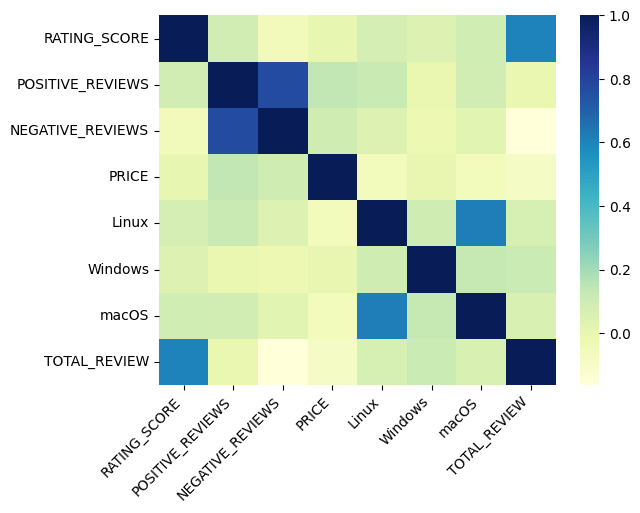

In [188]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Plotting correlation heatmap
ax = sb.heatmap(numerical_df.corr(), cmap="YlGnBu")

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

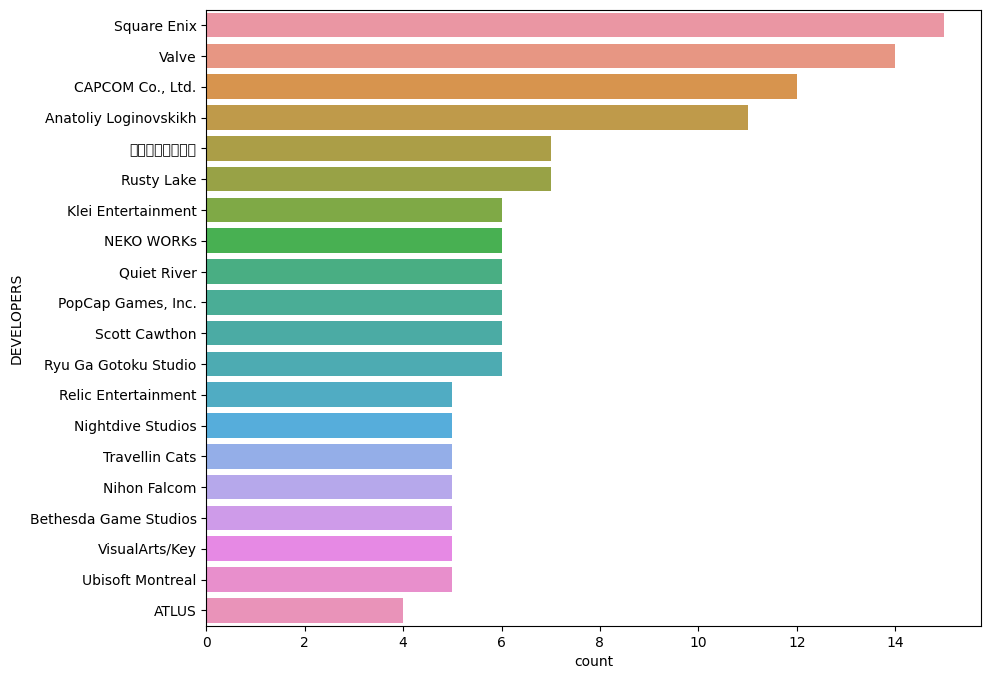

In [189]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Explode the array column
df_exploded = df.explode('DEVELOPERS')

# Get the top 10 developers
top_20_developers = df_exploded['DEVELOPERS'].value_counts().nlargest(20).index

# Filter the DataFrame for the top 10 developers
df_top_20 = df_exploded[df_exploded['DEVELOPERS'].isin(top_20_developers)]

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Plotting the distribution
sb.countplot(y='DEVELOPERS', data=df_top_20, order=top_20_developers)
plt.show()

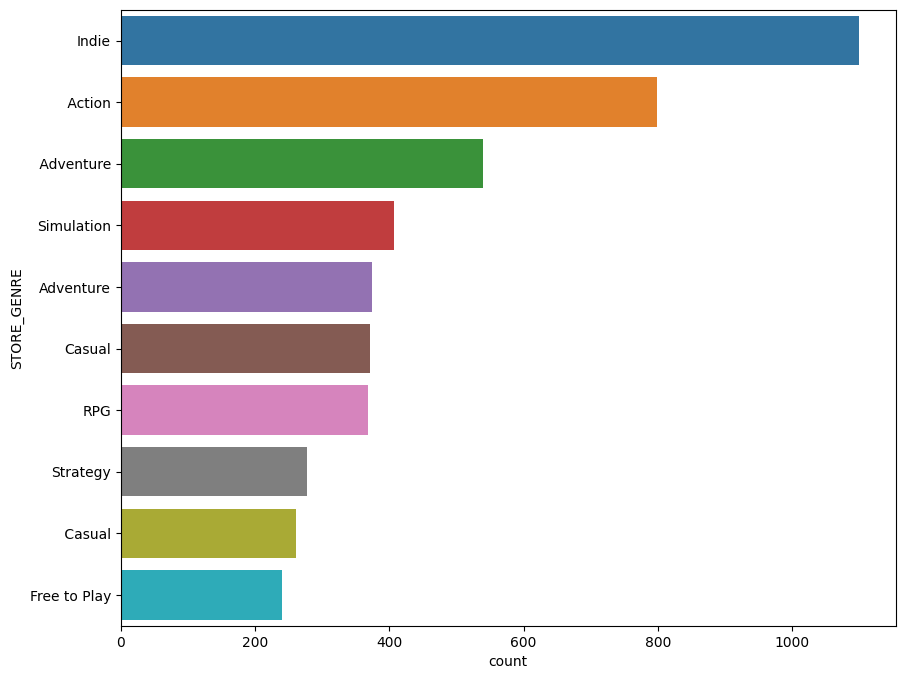

In [190]:
# Explode the array column
df_exploded = df.explode('STORE_GENRE')

# Get the top 10 developers
top_10_genre = df_exploded['STORE_GENRE'].value_counts().nlargest(10).index

# Filter the DataFrame for the top 10 developers
df_top_10 = df_exploded[df_exploded['STORE_GENRE'].isin(top_10_genre)]

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Plotting the distribution
sb.countplot(y='STORE_GENRE', data=df_top_10, order=top_10_genre)
plt.show()

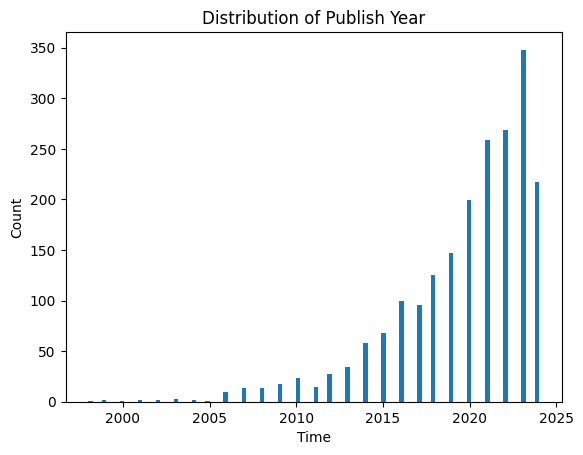

In [191]:
# Plot the histogram
plt.hist(filled_publish_year, bins=100)
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Distribution of Publish Year')
plt.show()


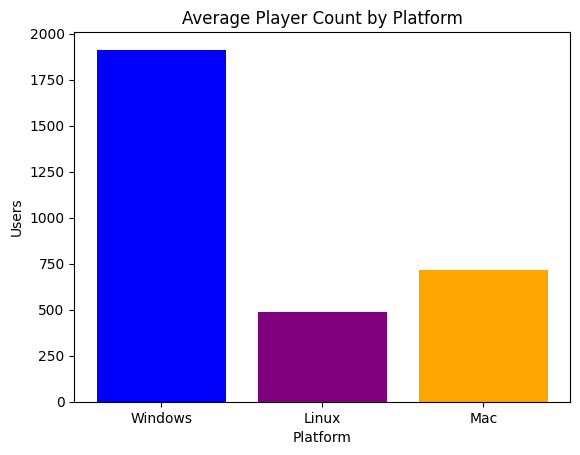

In [192]:
windows_player_counts = df['Windows'].sum()
linux_player_counts = df['Linux'].sum()
mac_player_counts = df['macOS'].sum()

# Create a bar chart to visualize the results
platforms = ['Windows', 'Linux', 'Mac']
average_player_counts = [windows_player_counts, linux_player_counts, mac_player_counts]
colors = ['blue', 'purple', 'orange']

plt.bar(platforms, average_player_counts, color=colors)
plt.title('Average Player Count by Platform')
plt.xlabel('Platform')
plt.ylabel('Users')
plt.show()

In [193]:
# Create a new column "PlatformCount" to represent the count of platforms supported by each game
cleaned_data_df = df.copy()
cleaned_data_df['PlatformCount'] = cleaned_data_df[['Windows', 'Linux', 'macOS']].sum(axis=1)

# Group the data by "PlatformCount" and calculate the metrics
platform_groups = cleaned_data_df.groupby('PlatformCount').agg({
    'RATING_SCORE': 'mean',
    'POSITIVE_REVIEWS': 'mean',
   # 'PRICE': 'mean',
    'NEGATIVE_REVIEWS': 'mean',
})

# Calculate "Price * #ofOwners" for each group
#platform_groups['PriceOwnersProduct'] = platform_groups['PriceFinal'] * platform_groups['SteamSpyOwners']

# Reset the index to make "PlatformCount" a regular column
platform_groups.reset_index(inplace=True)

platform_groups

,PlatformCount,RATING_SCORE,POSITIVE_REVIEWS,NEGATIVE_REVIEWS
0,0,8.273976,25578.000000,2100.596491
1,1,8.382977,16595.718310,1211.213908
2,2,8.475157,17302.875723,884.679191
3,3,8.489312,41694.976744,2023.844186


In [194]:
cleaned_data_df['PlatformCount']

0       1
1       1
2       2
3       3
4       1
       ..
2164    1
2165    3
2166    1
2167    1
2168    1
Name: PlatformCount, Length: 1969, dtype: int64

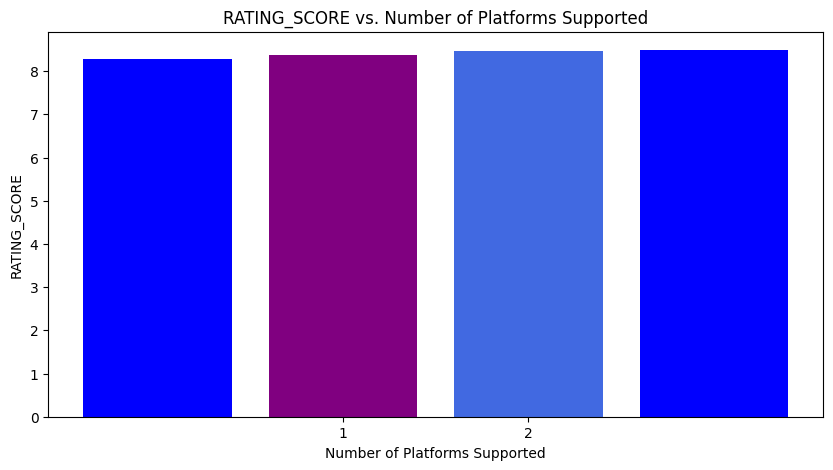

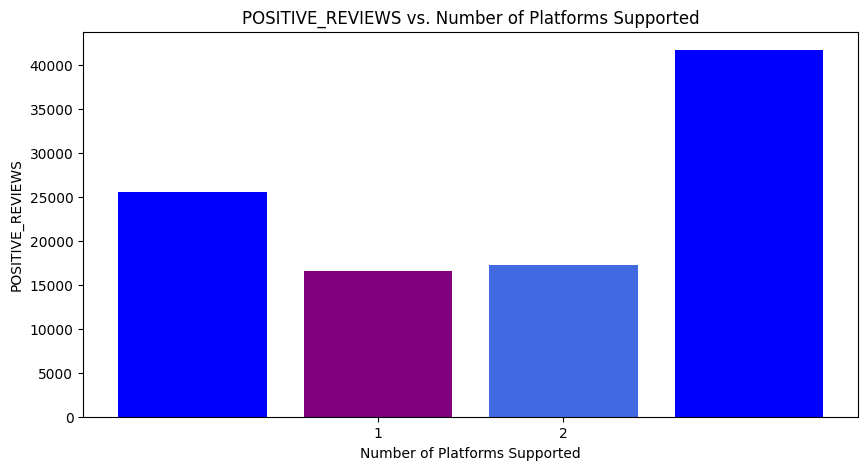

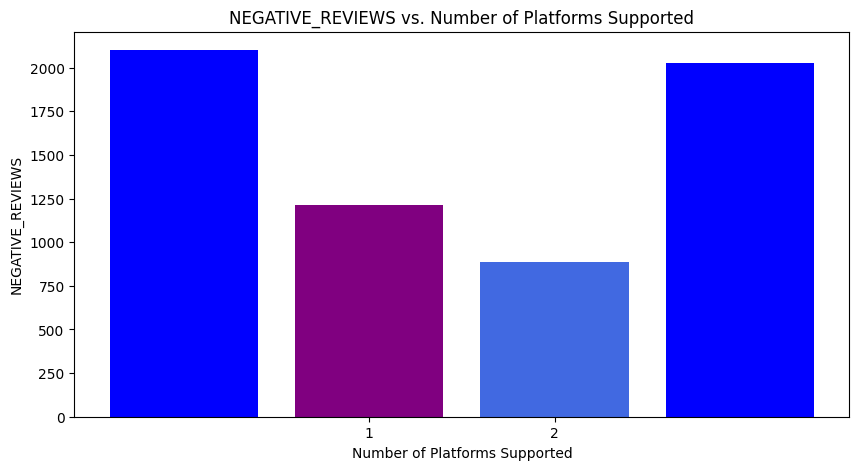

In [195]:
# Set custom colors for the bars
colors = ['blue', 'purple', 'royalblue']

# Loop through the metrics and create bar charts
metrics = ['RATING_SCORE', 'POSITIVE_REVIEWS', 'NEGATIVE_REVIEWS']

for metric in metrics:
    plt.figure(figsize=(10, 5))
    plt.bar(platform_groups['PlatformCount'], platform_groups[metric], color=colors)
    plt.xlabel('Number of Platforms Supported')
    plt.ylabel(metric)
    plt.title(f'{metric} vs. Number of Platforms Supported')
    plt.xticks(range(1, 3))
    plt.show()

In [196]:
df.nlargest(20, "TOTAL_REVIEW")["NAME"]

30                                    Two Cubes
111                                  彼方的她-Aliya
298                   Geneforge 2 - Infestation
313                         风与鸟 - Wind and Bird
319            我在疗养院送人上西天 / Last Stand Delivery
391                Cats and Seek : at Dino Park
397                            Owinka Shooter 2
399                         Of Mice and Moggies
409                          Ghost Girl Lasling
414                             Monkey Business
464                      Liminal Border Part II
498                                Harvest Hunt
572     Is this Game Trying to Kill Me? Preface
838                              Stunt Paradise
974                                  Pogo Rogue
1037      Sable's Grimoire: A Dragon's Treasure
1247                            Genome Guardian
2134                               祈風 Inorikaze
1551                            The WereCleaner
659                        Don't Escape Trilogy
Name: NAME, dtype: object

In [197]:
df['TOTAL_REVIEW'].nlargest(n=20)

30      1.000000
111     1.000000
298     1.000000
313     1.000000
319     1.000000
391     1.000000
397     1.000000
399     1.000000
409     1.000000
414     1.000000
464     1.000000
498     1.000000
572     1.000000
838     1.000000
974     1.000000
1037    1.000000
1247    1.000000
2134    1.000000
1551    0.998583
659     0.997389
Name: TOTAL_REVIEW, dtype: float64

In [198]:
df.query("TOTAL_REVIEW >= 0.994638").sort_values(by="TOTAL_REVIEW", ascending=False)[["NAME", "DEVELOPERS", "STORE_GENRE", "TOTAL_REVIEW"]]

,NAME,DEVELOPERS,STORE_GENRE,TOTAL_REVIEW
30,Two Cubes,Rombo,"[ Adventure, Indie]",1.000000
464,Liminal Border Part II,Purple Software,[ Adventure],1.000000
1247,Genome Guardian,Alpherior,"[ Action, Casual, Indie, RPG]",1.000000
1037,Sable's Grimoire: A Dragon's Treasure,Zetsubou,"[ Casual, Indie, Simulation]",1.000000
974,Pogo Rogue,Bounce Back Games,"[ Action, Adventure, Indie, Free to Play, Earl...",1.000000
838,Stunt Paradise,Brinemedia,"[ Indie, Racing, Sports]",1.000000
111,彼方的她-Aliya,TDGame,"[ Indie, RPG]",1.000000
572,Is this Game Trying to Kill Me? Preface,Stately Snail,"[ Adventure, Indie, Free to Play]",1.000000
498,Harvest Hunt,Villainous Games Studio,"[ Action, Adventure, Indie]",1.000000
2134,祈風 Inorikaze,Twilight -日月之境-,"[ Adventure, Casual, Indie]",1.000000


In [199]:
df = df.assign(**{"FREE": df.PRICE == 0})
df.head()

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,PRICE,24_HOUR_PEAK,PUBLISH_YEAR,Linux,Windows,macOS,TWITCH_PEAK_HOUR,TWITCH_PEAK_YEAR,TOTAL_REVIEW,FREE
0,Dragon's Dogma: Dark Arisen,"[ Action, Adventure, RPG]",8.0,7,Capcom,39271,5015,[],22.49,1064,2016,0,1,0,27368,2016,0.886759,False
1,Forza Horizon 5,"[ Action, Adventure, Racing, Simulation, Sports]",8.0,24,Playground Games,156683,21075,[],32.78,16131,2021,0,1,0,81096,2021,0.881440,False
2,Thrive,"[ Casual, Indie, Simulation, Early Access]",8.0,1,Revolutionary Games Studio,872,70,[Engine.Godot],2.99,21,2021,1,1,0,145,2022,0.925690,False
3,Layers of Fear (2016),"[ Adventure, Indie]",8.0,12,Bloober Team SA,22766,2819,[Engine.Unity],10.19,31,2016,1,1,1,145384,2018,0.889818,False
4,TaskPals,"[ Indie, Free to Play]",8.0,1,lazarche,834,66,"[Detected Technologies (?), SDK.SteamworksNET]",0.00,318,2023,0,1,0,3778,2023,0.926667,True


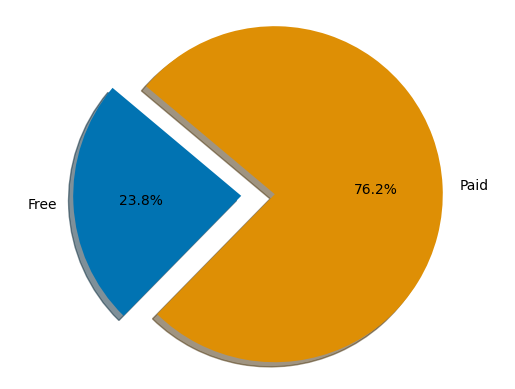

In [200]:
free_prices_dict = dict(df.FREE.value_counts())
labels = "Free", "Paid"
sizes = [free_prices_dict[True], free_prices_dict[False]]
explode = (0.2, 0)

with sb.color_palette('colorblind'):
    plt.pie(sizes, explode=explode, labels=labels, 
            autopct='%1.1f%%', shadow=True, startangle=140)
    
plt.axis('equal')
plt.show()

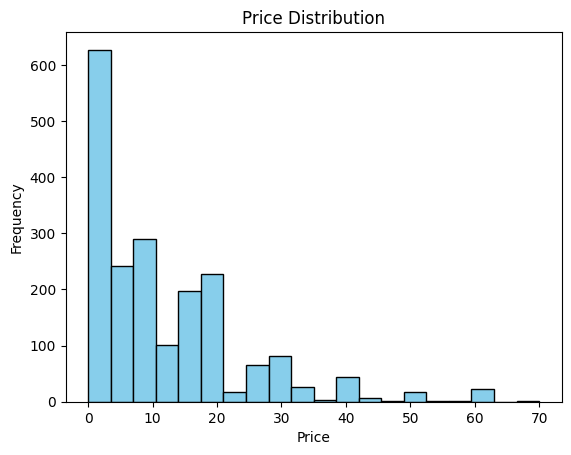

In [201]:
plt.hist(df['PRICE'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

In [204]:
print(sorted(df["PUBLISH_YEAR"].unique()))

[1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


In [206]:
average_price = df.groupby("PUBLISH_YEAR")["PRICE"].mean()
print(average_price)

PUBLISH_YEAR
1998     9.990000
1999     4.990000
2000     9.990000
2001     5.490000
2002    12.490000
2003     7.656667
2004     9.990000
2005     9.990000
2006    11.790000
2007     7.421429
2008     8.635000
2009     9.542222
2010    12.764545
2011    13.539333
2012    11.091200
2013    11.506970
2014    12.017037
2015    12.414179
2016    11.039485
2017    12.116222
2018    13.466639
2019    13.682837
2020    12.509735
2021    11.260366
2022    11.617403
2023    12.088142
2024     9.010927
Name: PRICE, dtype: float64


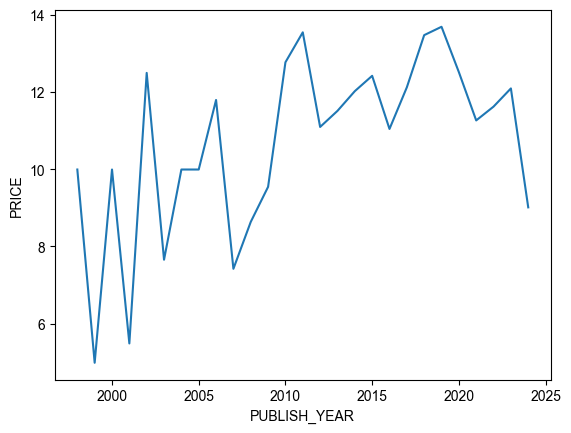

In [208]:
g = sb.lineplot(data=average_price, x="PUBLISH_YEAR", y=average_price)

sb.set(rc={'figure.figsize':(14,4)})
plt.show()

Are there any apparent genre trends across the past 3 decades?

Games Released Month and Price Analysis

Visualization Most Released Games month

Top 20 Games

Hypothesis Testing to verify that Rate of the games is same with pos/neg+pos reviews

Comparison of Top 20 Games based on Genre

Mean Price Difference by Genre